<a href="https://colab.research.google.com/github/Sh-Dulguun/Dulguun.github.io/blob/master/fuji_down_mountain_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Problem 1] Data visualization**
Visualize elevation data using Matplotlib. If you set "the number of the point" on the horizontal axis and "elevation" on the vertical axis, you can draw a cross-sectional view of Mt. Fuji.

If you look at this cross section, you can easily see the low place, but this time I imagine a situation where only the slope of your feet is known in the dark.

In [3]:
import numpy as np

csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

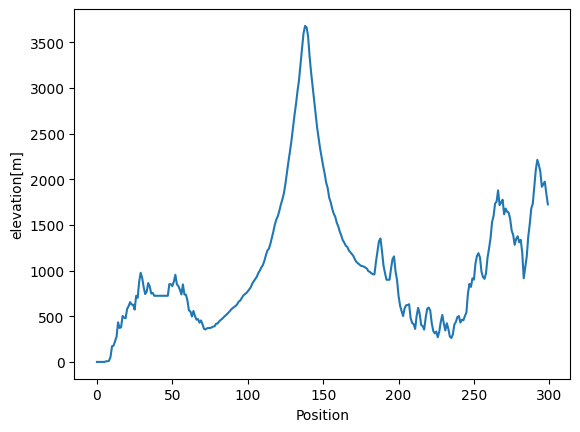

In [4]:
import matplotlib.pyplot as plt

position = fuji[:,0]
elevation = fuji[:,3]

fig , ax = plt.subplots()
ax.plot(position,elevation)
ax.set_xlabel('Position')
ax.set_ylabel('elevation[m]')
plt.show()

# **[Problem 2] Create a function to calculate the gradient at a certain point**
In "Two-dimensional array and gradient problem", the gradient at each point was calculated first. However, if you imagine Mt. Fuji in the dark, you can only know the slope of your current location.

Create a function to find the gradient by the relationship between "the number of the current point" and "the number of the next point you are now (number of the current point-1)".

The gradient was calculated by the following formula, but in this data, "elevation" corresponds to y and "the number of that point" corresponds to x.

In [6]:
def fuji_gradient(position, elevation,current_point):
  x1 = position[current_point]
  x2 = position[current_point-1]
  y1 = elevation[current_point]
  y2 = elevation[current_point-1]

  y_change = y1-y2
  x_change = x1-x2

  gradient = y_change/x_change

  return gradient

# **[Problem 3] CCreate a function to calculate the destination point**
Create a function that calculates the next point to move to based on the information on the slope of the current point.

Expressed in a mathematical formula, "destination point = current point-$ \ alpha $ x current point gradient".

Use the return value of the function created in Problem 2 for the "gradient of the current point". $ \ Alpha $ is a hyperparameter that takes any value greater than 0. In the field of machine learning, it is called the learning rate. The way of descending changes depending on this value. Here, for example, set it to 0.2.

<< Implementation Precautions >>

If you calculate the above formula, a floating point number will appear at the destination point, but in order to obtain the gradient information this time, the point must be represented by an integer. Therefore, please perform conversion by rounding. In addition, it is necessary to process when the value becomes impossible. For example, if the destination point is negative, then no such data exists and the next gradient cannot be obtained.

<< What are hyperparameters >>

In a machine learning method, it is a value that cannot be optimized by the method itself. The settings should be done with caution, as the value will change the behavior of the technique and affect the success of the learning. The simplest thing is that humans think of it as Settings, but there are also methods for mechanically determining hyperparameters.

In [8]:
def destination_point(current_point,slope_current_point, Alpha=0.2):
  destination_point = int(current_point - (Alpha*slope_current_point))
  return destination_point

# **[Problem 4] Create a function to go down the mountain**
Create a function that goes down the mountain. Receive the first point and update the point with the function in Problem 3. Record the points for each move in a list, etc., and use this as the return value of the function.

The first "current location" is the 136th location (elevation 3434.59 [m]) near the summit of Mt. Fuji. Let's go down the mountain from here.

<< Implementation Precautions >>

Since we are rounding in question 3, the destination point may be the same as the current point. Since the amount of movement has decreased, please judge that you have gone down the mountain at that point. This does not happen with the actual gradient descent method.

# **[Problem 5] Visualization of the descent process**
Visualize the descending process in Problem 4 with a graph using Matplotlib.

<< Visualization example >>
*   Display points moved in the cross section as dots
*   Make a line graph of altitude and slope for each repetition



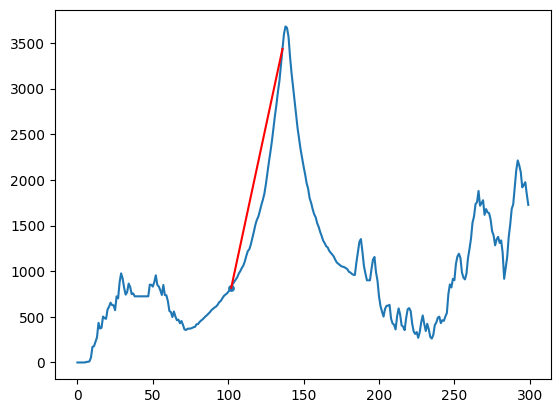

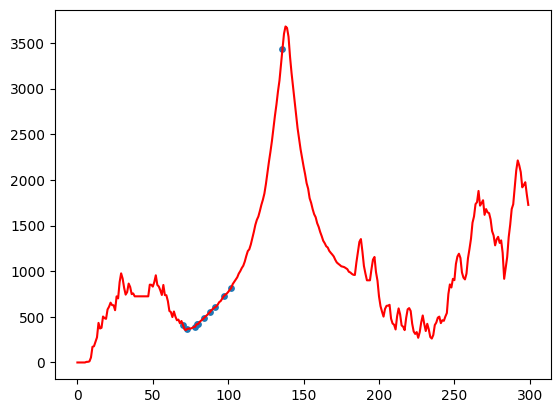

In [10]:
def compute_path(elevation, current_point, position, alpha=0.2):
    grad = elevation[current_point]-elevation[current_point-1]
    update_y = [elevation[current_point]]
    update_point = [current_point]
    fig, ax = plt.subplots()
    ax.plot(position, elevation)

    while grad > 0:
        grad = fuji_gradient(position, elevation, current_point)
        current_point = destination_point(current_point,grad,alpha)

        update_y.append(elevation[current_point])
        update_point.append(current_point)

        ax.scatter(current_point, elevation[current_point], s=15)
        ax.plot([update_point[-1],update_point[-2]], [update_y[-1],update_y[-2]], color = 'red')
        plt.pause(1)
        plt.show()
    return update_y, update_point

path = []
path_index = []
current_point = int(position[136])
alpha = 0.2

path, path_index = compute_path(elevation, current_point, position, alpha)
fig, ax = plt.subplots()
ax.plot(position, elevation, color='red')
ax.scatter(path_index, path, s=15)
plt.show()

# **[Problem 6] Change of initial value**
In Question 4, we fixed the first "where we are" to 136, but calculate this at all other points. Specifically, it means being able to change the "current location".

# **[Problem 7] Visualization of the descent process for each initial value**
In Problem 6, we calculated the descending process of all initial values. Therefore, please visualize what kind of descent process will be for some initial values as in Problem 5. It can be confirmed that the initial value affects the result in the gradient descent method.

<< What is the initial value? >>

The value like the first point in this example is called the initial value. Changing this will change the result. For example, 136 and 142 will go down different slopes of Mt. Fuji.





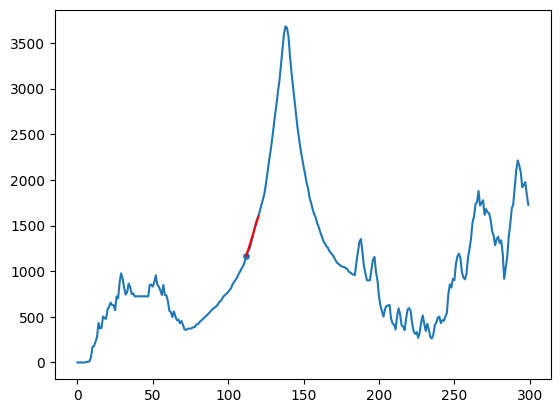

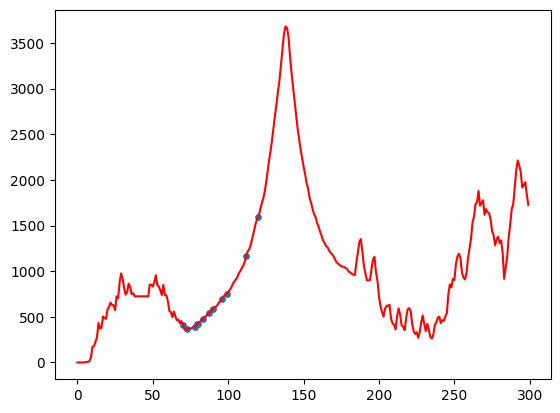

In [11]:
path = []
path_index = []
current_point = int(position[120])
alpha = 0.2

path, path_index = compute_path(elevation, current_point, position, alpha)
fig, ax = plt.subplots()
ax.plot(position, elevation, color='red')
ax.scatter(path_index, path, s=15)
plt.show()

# **[Problem 8] (Advance problem) Hyperparameter changes**
Visualize what kind of descent process will occur if you change the hyperparameter $ \ alpha $, as in problem 5. And make sure that the hyperparameters make a big difference in the results.

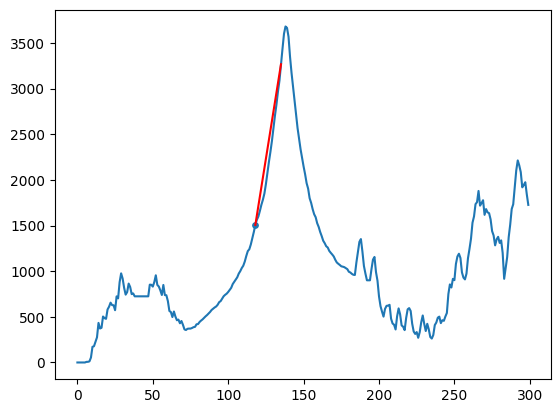

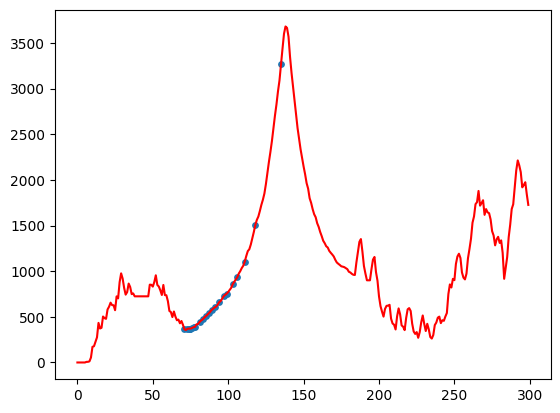

In [12]:
path = []
path_index = []
current_point = int(position[135])
alpha = 0.09

path, path_index = compute_path(elevation, current_point, position, alpha)
fig, ax = plt.subplots()
ax.plot(position, elevation, color='red')
ax.scatter(path_index, path, s=15)
plt.show()